In [57]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("train.csv")

In [59]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


(550068, 12)

<AxesSubplot:>

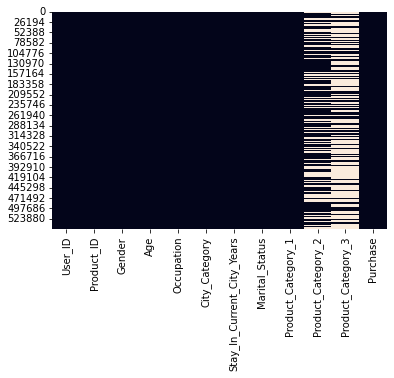

In [60]:
##CHECKING NULL VALUES
sns.heatmap(df.isnull() , cbar= False)

### DATA CLEANING amd PREPROCESSING

In [61]:
df["Product_Category_2"].fillna(df['Product_Category_2'].mode()[0], inplace = True)
df["Product_Category_3"].fillna(df['Product_Category_3'].mode()[0], inplace = True)
#Drop Usr_ID
df.drop(['User_ID'], axis = 1, inplace = True)

### Categorical to numerical

In [62]:

df['Gender'].replace(["F", "M"],[0,1],inplace=True)

#We can covert using label encoding or Ordinal Encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df["Age"] = le.fit_transform(df["Age"])

df.Age.unique()
# replace age with 1,2,3,4,5
df.Age.replace(["0-17","18-25","26-35","36-45","46-50","51-55","55+"],[1,2,3,4,5,6,7],inplace=True)


In [63]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [64]:
df['Stay_In_Current_City_Years'].replace(["4+"],[4],inplace=True)

In [65]:
# dropcity
df.drop(['City_Category'], axis = 1, inplace = True)



In [66]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969


In [67]:

## convert object to int
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 39.9+ MB


### EDA AND VIZ

In [69]:
sns.pairplot(df)